# Bayesian Linear Regression

- In the frequentist view, there is an issue of deciding the appropriate model complexity which is dependent on the number of basis functions.
- By a Bayesian version of lienar regression, we can avoid overfitting induced by maximum likelihood.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Parameter distribution

#### Prior distribution
- Prior distribution over the model parameter $\mathbf{w}$
- $p(\mathbf{w}) = N(\mathbf{w}| \mathbf{m_0}, \mathbf{S_0})$ with initial mean $\mathbf{m_0}$ and covariance $\mathbf{S_0}$
- Here, we simplify the problem with the assumption of zero-mean ($\mathbf{m_0} = \mathbf{0}$)) and isotropic Gaussian (precision parameter $\alpha$)
$$
p(\mathbf{w}| \alpha) = \mathcal{N}(\mathbf{w}| \mathbf{0}, \alpha^{-1} \mathbf{I})
$$

#### Posterior distribution
- Calculate posterior distribution by multiplying the prior distribution by the likelihood function
- Due to the choice of conjugate prior as Gaussian, the posterior will also be Gaussian

### Data preparation

In [27]:
data_size = 100
a_0, a_1 = -0.3, 0.5
x = np.random.uniform(low=0, high=2, size=data_size)
np.random.shuffle(x)
y = a_0*x + a_1

Text(0.5, 1.0, 'x-y data plot')

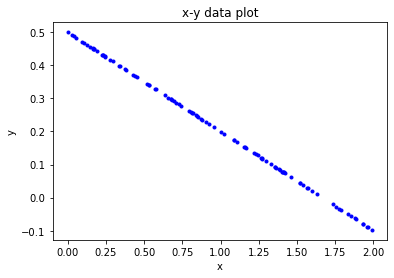

In [28]:
plt.plot(x, y, '.b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y data plot')

### Noise parameter
Here we add noise, $\epsilon \sim \mathcal{N} (0, \beta^{-1})$

In [31]:
noise = 0.1 * np.random.normal(0, 0.1, *y.shape)
y += noise

Text(0.5, 1.0, 'x-y data plot with noise')

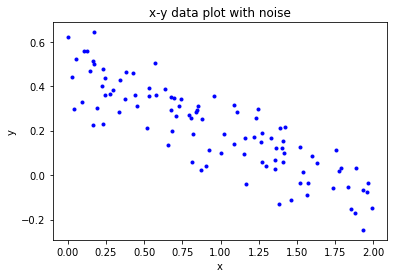

In [32]:
plt.plot(x, y, '.b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y data plot with noise')

### Linear regression in frequentist view
With the assumption that data points are i.i.d, the likelihood function is as follows:

\begin{equation*}
    p(\mathbf{y} | X, \mathbf{w}, \beta) = \prod_{n=1}^{N} \mathcal{N} (y_n | \mathbf{w}^{T} \phi(x_n), \beta^{-1})
\end{equation*}

\begin{align*}
    \ln {p(\mathbf{y} | X, \mathbf{w}, \beta)} &= \sum_{n=1}^{N} \mathcal{N} (y_n | \mathbf{w}^{T} \phi(x_n), \beta^{-1}) \\
    &= \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2\pi) - \beta E_D(\mathbf{w})
\end{align*}

Minimizing sum-of-square error function leads to the maximization of the likelihood function.<br>
\begin{equation*}
    E_D(w) = \frac{1}{2} \sum_{n=1}^{N} \{y_n - w^{T} \phi(x_n)\}^{2}
\end{equation*}

Solving the maximum log likelihood for $\mathbf{w}$ we get

\begin{equation*}
    \mathbf{w}_{ML} = (\Phi^{T} \Phi)^{-1} \Phi^{T} \mathbf{y}
\end{equation*}

where $\Phi$ is a $N \times M \textit{design matrix}$,

$
\Phi = \begin{pmatrix}
    \phi_0 (x_1) & \phi_1 (x_1) & \dots  & \phi_{M-1} (x_1) \\
    \phi_0 (x_2) & \phi_1 (x_2) & \dots  & \phi_{M-1} (x_2) \\
    \vdots       & \vdots       & \ddots & \dots            \\
    \phi_0 (x_N) & \phi_1 (x_N) & \dots  & \phi_{M-1} (x_N) \\
\end{pmatrix}
$


#### Gaussian basis function

\begin{equation*}
    \phi_j = \exp \Big(-\frac{x-\mu_j}{2s^2} \Big)
\end{equation*}

where $\mu_j$ and $s$ determine the location (input $X$) and the spatial size of the input space.

In [ ]:
def phi(x):
    s = 0.1
    return np.exp